## 9.1 경진대회 이해
- 과거 판매 데이터를 보고 향후 판매량 예측
- 상품, 상점, 상품분류에 관한 데이터 존재 : shops, items, item_categories
- 월간 판매량은 모두 0-20 사이로 간주 : 음수 및 20이상 허용 안함

## 9.2 탐색적 데이터 분석
### 9.2.1 데이터 둘러보기
- sales_train : 월별 판매량을 구해야 하니 월 만 있으면 되고, date 필요없ㅇ므
    - 상품 판매가는 날짜나 상점에 따라 달라질 수 있음
    - 각 상점의 상품별 일일 판매량을 월별로 합친 값이 곧 각 상점의 상품별 월간 판매량 => date_block_um피쳐를 기준으로 그웁화해서 ITEm_cnt_day 합하면 타깃값이 됨
    - 행이 1,690,785개보다 많거나, 열이 100개보다 많으면 info()가 결측값갯수를 출력하지 않으므로, show_counts=True 전달 필요 => 결측값은 없으며, 메모리 사용량은 가능한 줄여줘야 함
    - 시계열 데이터 : 시간흐름 중요 => 13.01 - 15.09 훈련데이터, 15.10 검증데이터 사용
- shops : 상점명 러시아어, shop_id 피쳐는 sales_train에도 있으므로 병합 가능, 결측값 없음
- items : 유용한 데이터 없음, item_id 기준으로 병합 가능, 결측값 없음
- item_categories : item_category_id기준으로 병합 가능, 러시아어, 결측값 없음

In [1]:
import pandas as pd

path = "data/competitive-data-science-predict-future-sales/"

sales_train = pd.read_csv(path + 'sales_train.csv')
shops = pd.read_csv(path + 'shops.csv')
items = pd.read_csv(path + 'items.csv')
item_categories = pd.read_csv(path + 'item_categories.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'sample_submission.csv')

In [2]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [4]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [8]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [10]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [12]:
train = sales_train.merge(shops, on='shop_id', how='left')
train = train.merge(items, on='item_id', how='left')
train = train.merge(item_categories, on='item_category_id', how='left')

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


resumetable
- id와 name 고윳값 갯수 동일 : 일대일 매칭> 하나만 있어도 됨
- name을 이용해서 파생피쳐를 만들수도?

In [14]:
def resumetable(df):
    print(f"dataset shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':' 피쳐'})
    summary['결측값 갯수'] = df.isnull().sum().values
    summary['고윳값 갯수'] = df.nunique().values
    summary['첫번째 값'] = df.loc[0].values
    summary['두번째 값'] = df.loc[1].values
    
    return summary

resumetable(train)

dataset shape: (2935849, 10)


,피쳐,데이터 타입,결측값 갯수,고윳값 갯수,첫번째 값,두번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


### 9.2.2 데이터 시각화
- 일별 판매량 
    - item_cnt_day : 이상치가 많아 박스 납작, 1000이상 제거
    - item_price : 동일, 50000 이상 제거
    - 월별 11, 23일 때 가장 판매량 많은데, 13년 12월, 14년 12월 => 연말 판매 급증
- 상품 분류별 판매량 : ID 40 상품 분류 가장 많이 팔림, 30, 55가 뒤따름
- 상점별 판매량 : 7~8개 상점이 다른 상점보다 많이 판매


<AxesSubplot:ylabel='item_cnt_day'>

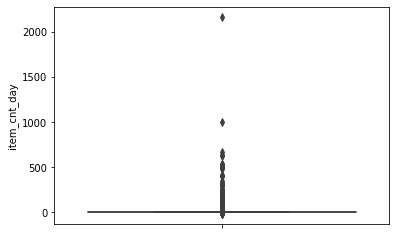

In [15]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(y='item_cnt_day', data=train)

<AxesSubplot:ylabel='item_price'>

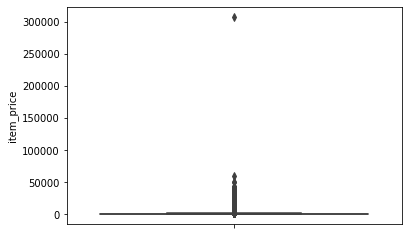

In [16]:
sns.boxplot(y='item_price', data=train)

In [17]:
# data_block_num을 기준으로 그룹화에 item_cnt_day의 합을 구함 : 월별 월간 판매량
group = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
group.reset_index() # 호출하지 않으면 data_block_num이 인덱스로 설정

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


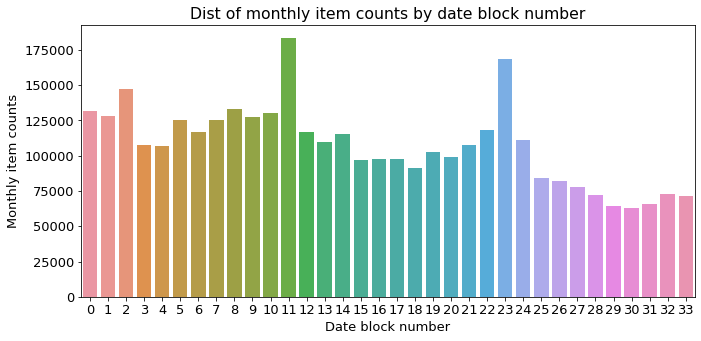

In [22]:
mpl.rc('font', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(11,5)

# 월별 총 상품 판매량
group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day' : 'sum'})
group_month_sum = group_month_sum.reset_index()

sns.barplot(x='date_block_num', y='item_cnt_day', data=group_month_sum);
ax.set(title="Dist of monthly item counts by date block number", 
      xlabel='Date block number',
      ylabel='Monthly item counts');

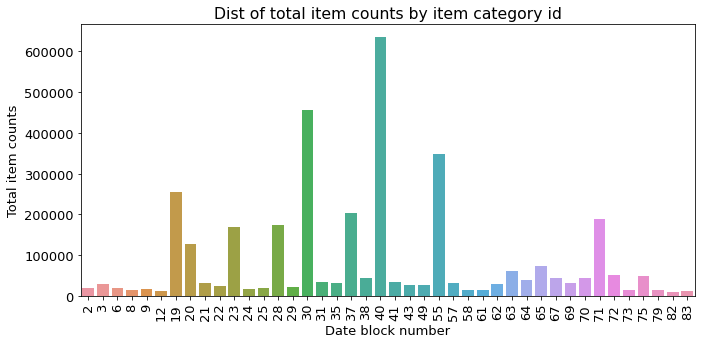

In [26]:
# 상품 분류별 판매량
figure, ax = plt.subplots()
figure.set_size_inches(11,5)

group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day':'sum'})
group_cat_sum = group_cat_sum.reset_index()

group_cat_sum = group_cat_sum.loc[group_cat_sum['item_cnt_day'] > 10000]

sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum);
ax.set(title='Dist of total item counts by item category id',
      xlabel = 'Date block number', ylabel='Total item counts');
ax.tick_params(axis='x', labelrotation=90)

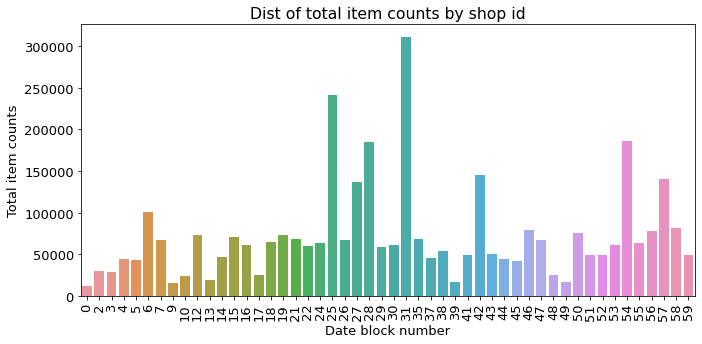

In [27]:
# 상점별 판매량
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

group_shop_sum = train.groupby('shop_id').agg({'item_cnt_day': 'sum'})
group_shop_sum = group_shop_sum.reset_index()

group_shop_sum = group_shop_sum.loc[group_shop_sum['item_cnt_day'] > 10000]

sns.barplot(x='shop_id', y='item_cnt_day', data=group_shop_sum);
ax.set(title="Dist of total item counts by shop id",
      xlabel='Date block number',
      ylabel='Total item counts');
ax.tick_params(axis='x', labelrotation=90)


## 9.3 베이스라인 모델
- 피쳐 엔지니어링 : 피쳐명 한글화 -> 다운캐스팅 -> 데이터조합 생성 -> 파생피쳐 추가 -> 테스트 데이터 이어붙이기 -> 나머지 데이터 병합(최종 데이터 생성) -> 훈련, 검증, 테스트 데이터 만들기

In [48]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

path = "data/competitive-data-science-predict-future-sales/"

sales_train = pd.read_csv(path + 'sales_train.csv')
shops = pd.read_csv(path + 'shops.csv')
items = pd.read_csv(path + 'items.csv')
item_categories = pd.read_csv(path + 'item_categories.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'sample_submission.csv')

## 9.3.1 피쳐 엔지니어링 : 피처명 한글화
- 파생변수도 만들 예정이라, 잘 알아보기 위함

In [49]:
sales_train = sales_train.rename(columns={'date':'날짜', 'date_block_num':'월ID',
                                         'shop_id' : '상점ID', 'item_id':'상품ID',
                                         'item_price' : '판매가', 'item_cnt_day':'판매량'})
sales_train.head()

,날짜,월ID,상점ID,상품ID,판매가,판매량
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [50]:
shops = shops.rename(columns={'shop_name':'상점명', 'shop_id' : '상점ID'})
shops.head()

,상점명,상점ID
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [51]:
items = items.rename(columns={'item_name': '상품명', 'item_id':'상품ID', 'item_category_id': '상품분류ID'})
items.head()

,상품명,상품ID,상품분류ID
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [52]:
item_categories = item_categories.rename(columns={'item_category_name':'상품분류명', 'item_category_id':'상품분류ID'})
item_categories.head()

,상품분류명,상품분류ID
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [53]:
test = test.rename(columns={'shop_id':'상점ID', 'item_id':'상품ID'})
test.head()

,ID,상점ID,상품ID
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


### 9.3.2 피쳐 엔지니어링 : 데이터 다운캐스팅
- 데이터가 작은데 큰 데이터타입을 사용하면 메모리 낭비 ## 198p


In [54]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024 ** 2 
    
    if verbose:
        print('{:.1f}% 압축됨'.format(100*(start_mem - end_mem)/start_mem))
    
    return df

In [55]:
all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

62.5% 압축됨
38.6% 압축됨
54.2% 압축됨
39.9% 압축됨
70.8% 압축됨


### 9.3.3 피쳐 엔지니어링 : 데이터 조합 생성
- 월, 상점, 상품별 조합 필요 & 데이터가 없더라도 0이라도 있는게 나음

In [56]:
from itertools import product

train = []

for i in sales_train['월ID'].unique():
    all_shop = sales_train.loc[sales_train['월ID']==i, '상점ID'].unique()
    all_item = sales_train.loc[sales_train['월ID']==i ,'상품ID'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))

idx_features = ['월ID', '상점ID', '상품ID']    
train = pd.DataFrame(np.vstack(train), columns=idx_features)

train

,월ID,상점ID,상품ID
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10913845,33,21,7635
10913846,33,21,7638
10913847,33,21,7640
10913848,33,21,7632


### 9.3.4 피쳐 엔지니어링 : 타깃값(월간 판매량) 추가
- 일별 판매량을 기준으로 그룹화하여 월별 판매량 산출

In [57]:
group = sales_train.groupby(idx_features).agg({"판매량": 'sum'})

group = group.reset_index()
group = group.rename(columns={'판매량' : '월간 판매량'})

group

,월ID,상점ID,상품ID,월간 판매량
0,0,0,32,6
1,0,0,33,3
2,0,0,35,1
3,0,0,43,1
4,0,0,51,2
...,...,...,...,...
1609119,33,59,22087,6
1609120,33,59,22088,2
1609121,33,59,22091,1
1609122,33,59,22100,1


In [58]:
train = train.merge(group, on=idx_features, how='left')

train

,월ID,상점ID,상품ID,월간 판매량
0,0,59,22154,1.0
1,0,59,2552,NaN
2,0,59,2554,NaN
3,0,59,2555,NaN
4,0,59,2564,NaN
...,...,...,...,...
10913845,33,21,7635,NaN
10913846,33,21,7638,NaN
10913847,33,21,7640,NaN
10913848,33,21,7632,NaN


In [59]:
# 할당 메모리 중 사용하지 않는 영역 제외
import gc

del group
gc.collect();

### 9.3.5 피쳐 엔지니어링 : 테스트 데이터 이어붙이기
- 뒤이어 shops, items, item_categories 병합할 것 인데 한번에 하는게 좋음

In [60]:
# 테스트 데이터 월 ID 34 추가
test['월ID'] = 34

all_data = pd.concat([train, test.drop('ID', axis=1)],
                    ignore_index=True, keys=idx_features)
all_data = all_data.fillna(0)

all_data

,월ID,상점ID,상품ID,월간 판매량
0,0,59,22154,1.0
1,0,59,2552,0.0
2,0,59,2554,0.0
3,0,59,2555,0.0
4,0,59,2564,0.0
...,...,...,...,...
11128045,34,45,18454,0.0
11128046,34,45,16188,0.0
11128047,34,45,15757,0.0
11128048,34,45,19648,0.0


### 9.3.6 피쳐 엔지니어링 : 나머지 테이터 병합 (최종 데이터)

In [62]:
all_data = all_data.merge(shops, on='상점ID', how='left')
all_data = all_data.merge(items, on='상품ID', how='left')
all_data = all_data.merge(item_categories, on='상품분류ID', how='left')

all_data = downcast(all_data)

del shops, items, item_categories
gc.collect();

26.4% 압축됨


In [63]:
all_data.head()

,월ID,상점ID,상품ID,월간 판매량,상점명,상품명,상품분류ID,상품분류명
0,0,59,22154,1,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,0,59,2552,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,0,59,2554,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
3,0,59,2555,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства
4,0,59,2564,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео


In [64]:
# 상점명, 상품명, 상품분류명 피쳐들은 ID와 일대일 매칭되므로 제거
all_data = all_data.drop(['상점명', '상품명', '상품분류명'], axis=1)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11128050 entries, 0 to 11128049
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   월ID     int8 
 1   상점ID    int8 
 2   상품ID    int16
 3   월간 판매량  int16
 4   상품분류ID  int8 
dtypes: int16(2), int8(3)
memory usage: 159.2 MB


### 9.3.7 피쳐 엔지니어링 7 : 마무리
- 훈련데이터 : 13.01 ~ 15.09(ID 32) 판매내역
- 검증데이터 : 15.10(ID 33) 판매내역
- 테스트 데이터 : 15.11(ID 34) 판매내역

In [65]:
X_train = all_data.loc[all_data['월ID'] < 33]
X_train = X_train.drop(['월간 판매량'], axis=1)

X_valid = all_data.loc[all_data['월ID'] == 33]
X_valid = X_valid.drop(['월간 판매량'], axis=1)

X_test = all_data.loc[all_data['월ID']== 34]
X_test = X_test.drop(['월간 판매량'], axis=1)

y_train = all_data.loc[all_data['월ID'] < 33]['월간 판매량']
y_train = y_train.clip(0,20) # 타겟ㄱ밧 범위 제한

y_valid = all_data.loc[all_data['월ID'] == 33]['월간 판매량']
y_valid = y_valid.clip(0,20) # 타겟ㄱ밧 범위 제한

del all_data
gc.collect();

### 9.3.8 모델 훈련 및 성능검증
- 상점ID와 상품분류ID만 인수로 전달 : 상품ID는 고윳값 갯수가 상당히 많음. 고유값 갯수가 너무 많은 피쳐는 수치형 데이터로 취급해야 성능이 더 잘 나옴(LightGBM document)
- categorical_feature 파라미터에 아무 값도 전달하지 않으면 category 타입인 데이터를 범주형 데이터로 인식 : 미리 category 타입으로 바꾸면 categorical_feature 파라미터에 범주형 데이터를 전달하지 않아도 모델훈련 결과는 같음

In [66]:
import lightgbm as lgb

params = {
    'metric':'rmse',
    'num_leaves' : 255,
    'learning_rate' : 0.01,
    'force_col_wise' : True,
    'random_state' : 10,   
    }

cat_features = ['상점ID', '상품분류ID']

dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

lgb_model = lgb.train(params=params, train_set=dtrain,
                     num_boost_round=500, valid_sets=(dtrain, dvalid),
                     categorical_feature=cat_features, verbose_eval=50)

[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 10675678, number of used features: 4
[LightGBM] [Info] Start training from score 0.299125
[50]	training's rmse: 1.1478	valid_1's rmse: 1.06808
[100]	training's rmse: 1.11378	valid_1's rmse: 1.03754
[150]	training's rmse: 1.09616	valid_1's rmse: 1.02483
[200]	training's rmse: 1.08478	valid_1's rmse: 1.01789
[250]	training's rmse: 1.07631	valid_1's rmse: 1.01369
[300]	training's rmse: 1.06928	valid_1's rmse: 1.00976
[350]	training's rmse: 1.06362	valid_1's rmse: 1.00754
[400]	training's rmse: 1.05729	valid_1's rmse: 1.00543
[450]	training's rmse: 1.05223	valid_1's rmse: 1.00397
[500]	training's rmse: 1.04798	valid_1's rmse: 1.00336


In [68]:
preds = lgb_model.predict(X_test).clip(0,20)

submission['item_cnt_month'] = preds
submission.to_csv('submission.csv', index=False)

del X_train, y_train, X_valid, y_valid, X_test, lgb_model, dtrain, dvalid
gc.collect();

## 9.4 성능 개선
- 피쳐엔지니어링
    - 피쳐명 한글화, 다운캐스팅 -> 개별 데이터 피쳐엔지니어링 -> 데이터조합 & 파생 피쳐 추가 -> 데이터 합치기 -> 시차 피쳐 생성 -> 그외 피쳐 엔지니어링

In [201]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

path = "data/competitive-data-science-predict-future-sales/"

sales_train = pd.read_csv(path + 'sales_train.csv')
shops = pd.read_csv(path + 'shops.csv')
items = pd.read_csv(path + 'items.csv')
item_categories = pd.read_csv(path + 'item_categories.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path +'sample_submission.csv')

In [202]:
# 피쳐 명 한글화
sales_train = sales_train.rename(columns={'date':'날짜', 'date_block_num':'월ID',
                                         'shop_id':'상점ID', 'item_id':'상품ID',
                                         'item_price':'판매가', 'item_cnt_day':'판매량'})
shops = shops.rename(columns={'shop_name':'상점명', 'shop_id':'상점ID'})
items = items.rename(columns={'item_name':'상품명','item_id':'상품ID', 'item_category_id':'상품분류ID'})
item_categories = item_categories.rename(columns={'item_category_name':'상품분류명', 'item_category_id' : '상품분류ID'})
test = test.rename(columns={'shop_id':'상점ID', 'item_id':'상품ID'})

In [203]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024 ** 2
    
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    
    end_mem = df.memory_usage().sum() / 1024 ** 2

    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)
        

62.5% 압축됨
38.6% 압축됨
54.2% 압축됨
39.9% 압축됨
70.8% 압축됨


### 9.4.2 피쳐 엔지니어링 : 개별 데이터 피쳐 엔지니어링
- sales_train 
    - 이상치 제거 : 판매가, 판매량이 음수라면 환불이나 오류 & 판매가 50000 이상, 판매량 1000이상

- shops
    - 같은 상점인데 조금 다르게 기입해서 따로 기록되어있는 4쌍 : 같은 의미화
    - 파생 피쳐 생성 : 상점명의 첫 단어 도시 & 레이블 인코딩(트리기반 모델은 레이블 인코딩 단점이 어느정도 무마)
    
- items
    - 첫 판매 월 피쳐 생성 : sales_train을 상품ID로 그룹화 한 뒤, 그룹에서 월 ID 최솟값 구하기 (판매 내역 중 상품 ID가 가장 처음 등장한 날의 월 ID)
    
- item_categories
    - 대분류 피쳐 생성 : 상품 분류명의 첫 단어가 범주 대분류 => 범주형 데이터가 지나치게 세밀하면 각 범주에 해당하는 데이터의 절대 갯수가 적어져 제대로 훈련되지 못할 수 있음. 

In [204]:
sales_train = sales_train.loc[sales_train['판매가'] > 0]
sales_train = sales_train.loc[sales_train['판매가'] < 50000]

sales_train = sales_train.loc[sales_train['판매량'] > 0]
sales_train = sales_train.loc[sales_train['판매량'] < 1000]                              

In [205]:
print(shops['상점명'][0], '&', shops['상점명'][57])
print(shops['상점명'][1], '&', shops['상점명'][58])
print(shops['상점명'][10], '&', shops['상점명'][11])
print(shops['상점명'][39], '&', shops['상점명'][40])

same_mean_dict = {0:57, 1:58, 10:11, 39:40}

for i in range(len(shops)):
        if i in list(same_mean_dict.keys()):
            sales_train['상점ID'][i] = same_mean_dict[i]
            test['상점ID'][i] = same_mean_dict[i]
            
# for idx in list(same_mean_dict.keys()):
#     print(idx)
#     print(sales_train['상점ID'][idx], test['상점ID'][idx])

!Якутск Орджоникидзе, 56 фран & Якутск Орджоникидзе, 56
!Якутск ТЦ "Центральный" фран & Якутск ТЦ "Центральный"
Жуковский ул. Чкалова 39м? & Жуковский ул. Чкалова 39м²
РостовНаДону ТРК "Мегацентр Горизонт" & РостовНаДону ТРК "Мегацентр Горизонт" Островной


In [206]:
shops['도시'] = shops['상점명'].apply(lambda x:x.split()[0])
shops.loc[shops['도시']=='!Якутск', '도시'] = 'Якутск' # 잘못 입력된 특수문자 ! 지우기
shops['도시'].unique()

array(['Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Ярославль'], dtype=object)

In [207]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
shops['도시'] = label_encoder.fit_transform(shops['도시'])
shops = shops.drop('상점명', axis=1)
shops.head()

,상점ID,도시
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [208]:
items = items.drop(['상품명'], axis=1)

items['첫 판매월'] = sales_train.groupby('상품ID').agg({'월ID':'min'})['월ID']
items.head()

,상품ID,상품분류ID,첫 판매월
0,0,40,20.0
1,1,76,15.0
2,2,40,19.0
3,3,40,18.0
4,4,40,20.0


In [209]:
# 결측값 많음 : 한번도 팔리지 않은 상품 => 처음 팔린 달을 15년 11월로 가정 
# (11월에도 안 팔릴 수 있으나, 데이터에 없는 상품이면 아예 고려대상이 아니라 영향 없음)
items.loc[items['첫 판매월'].isna()]
items['첫 판매월'] = items['첫 판매월'].fillna(34)

In [210]:
item_categories['대분류'] = item_categories['상품분류명'].apply(lambda x:x.split()[0])
item_categories['대분류'].value_counts()

Игры          14
Книги         13
Подарки       12
Игровые        8
Аксессуары     7
Музыка         6
Программы      6
Карты          5
Кино           5
Служебные      2
Чистые         2
PC             1
Билеты         1
Доставка       1
Элементы       1
Name: 대분류, dtype: int64

In [211]:
# 고윳값 5 미만일 경우 etc로 변경
def make_etc(x):
    if len(item_categories.loc[item_categories['대분류']==x]) >= 5:
        return x
    else:
        return 'etc'

item_categories['대분류'] = item_categories['대분류'].apply(make_etc)
item_categories.head()

,상품분류명,상품분류ID,대분류
0,PC - Гарнитуры/Наушники,0,etc
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары


In [212]:
label_encoder = LabelEncoder()

item_categories['대분류'] = label_encoder.fit_transform(item_categories['대분류'])

item_categories = item_categories.drop('상품분류명', axis=1)

### 9.4.3 피쳐 엔지니어링 : 데이터 조합 및 파생피쳐 생성
- 데이터 조합 후, 월간 판매량, 평균 판매가, 판매건수 피쳐 생성
    - 월간 판매량 & 평균 판매가
    - 기준 피쳐별 상품 판매건수 : count 사용

In [213]:
from itertools import product

train = []
for i in sales_train['월ID'].unique():
    all_shop = sales_train.loc[sales_train['월ID']==i, '상점ID'].unique()
    all_item = sales_train.loc[sales_train['월ID']==i, '상품ID'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))

idx_features = ['월ID', '상점ID', '상품ID']
train = pd.DataFrame(np.vstack(train), columns=idx_features)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10916900 entries, 0 to 10916899
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   월ID     int16
 1   상점ID    int16
 2   상품ID    int16
dtypes: int16(3)
memory usage: 62.5 MB


In [214]:
group = sales_train.groupby(idx_features).agg({'판매량':'sum', '판매가':'mean'})

group = group.reset_index()
group = group.rename(columns={'판매량': '월간 판매량', '판매가': '평균 판매가'})

train = train.merge(group, on=idx_features, how='left')
train.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가
0,0,57,22154,1.0,999.0
1,0,57,2552,NaN,NaN
2,0,57,2554,NaN,NaN
3,0,57,2555,NaN,NaN
4,0,57,2564,NaN,NaN


In [215]:
import gc

del group
gc.collect()

50

In [216]:
group = sales_train.groupby(idx_features).agg({'판매량':'count'})
group = group.reset_index()
group = group.rename(columns={'판매량':'판매건수'})

train = train.merge(group, on=idx_features, how='left')

del group, sales_train
gc.collect()

train.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가,판매건수
0,0,57,22154,1.0,999.0,1.0
1,0,57,2552,NaN,NaN,NaN
2,0,57,2554,NaN,NaN,NaN
3,0,57,2555,NaN,NaN,NaN
4,0,57,2564,NaN,NaN,NaN


### 9.4.4 피쳐 엔지니어링 : 데이터 합치기

In [217]:
test['월ID'] = 34

all_data = pd.concat([train, test.drop('ID', axis=1)],
                    ignore_index=True, keys=idx_features)

all_data = all_data.fillna(0) # 결측값 0 대체

# 모든 데이터 병합
all_data = all_data.merge(shops, on='상점ID', how='left')
all_data = all_data.merge(items, on='상품ID', how='left')
all_data = all_data.merge(item_categories, on='상품분류ID', how='left')

del shops, items, item_categories
gc.collect();

all_data = downcast(all_data)
all_data.head()

64.6% 압축됨


,월ID,상점ID,상품ID,월간 판매량,평균 판매가,판매건수,도시,상품분류ID,첫 판매월,대분류
0,0,57,22154,1,999.0,1,29,37,0,5
1,0,57,2552,0,0.0,0,29,58,0,7
2,0,57,2554,0,0.0,0,29,58,0,7
3,0,57,2555,0,0.0,0,29,56,0,7
4,0,57,2564,0,0.0,0,29,59,0,7


### 9.4.5 피쳐 엔지니어링 : 시차 피쳐 생성
- 과거 시점에 관한 피쳐 : 시계열 문제에 도움, 현 시점 데이터에 과거 시점 데이터를 추가한다는 개념, 과거 시점 데이터는 향후 판매량 예측에 유용
    - 너무 과거일 경우 예측력이 떨어질 수 있어, 여기선 세 달 전까지만 만듬
- 기준 삼을 피쳐 정하고, 여러 기준 별 월간 평균 판매량 피쳐 구한 뒤, 징검다리 삼아 시차 피쳐 생성
    - 징검다리 피쳐 : 상품ID별 평균 판매량, [상품ID + 도시]별 평균 판매량, [상점ID + 상품범주ID]별 평균 판매량
    - 시차 피쳐 : 월간 판매량, 판매건수 & 평균 판매가, 평균 판매량
        - 기준 피쳐 별 월간 판매량 : 상점별, 상품별, 각 상점의 상품별 등 가능
        - 판매건수, 평균 판매가
        - 평균 판매량
    - 세 달 치 시차 피쳐이므로, 자연스럽게 ID 0,1,2에는 결측값 존재
    

In [219]:
def add_mean_features(df, mean_features, idx_features):
    '''
    df : 작업할 전체 데이터
    mean_features : 새로 만든 월간 평균 판매량 파생 피쳐명 저장 리스트
    idx_features : 기준 피쳐
    '''
    # 기준 피쳐 첫 요소는 월ID이여야 하며, 기준 피쳐 수는 2~3개 (과도하게 세분화 방지)
    assert (idx_features[0] == '월ID') and (len(idx_features) in [2,3])
    
    if len(idx_features) == 2:
        feature_name = idx_features[1] + '별 평균 판매량'
    else:
        feature_name = idx_features[1] + ' ' + idx_features[2] + '별 평균 판매량'
        
    group = df.groupby(idx_features).agg({'월간 판매량': 'mean'})
    group = group.reset_index()
    group = group.rename(columns={'월간 판매량' : feature_name})
    
    df = df.merge(group, on=idx_features, how='left')
    df = downcast(df, verbose=False)
    
    mean_features.append(feature_name)
    
    del group
    gc.collect()
    
    return df, mean_features

In [220]:
item_mean_features = []

all_data, item_mean_features = add_mean_features(df=all_data,
                                                mean_features=item_mean_features,
                                                idx_features=['월ID', '상품ID'])

all_data, item_mean_features = add_mean_features(df=all_data,
                                                mean_features=item_mean_features,
                                                idx_features=['월ID', '상품ID', '도시'])

item_mean_features

['상품ID별 평균 판매량', '상품ID 도시별 평균 판매량']

In [221]:
all_data.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가,판매건수,도시,상품분류ID,첫 판매월,대분류,상품ID별 평균 판매량,상품ID 도시별 평균 판매량
0,0,57,22154,1,999.0,1,29,37,0,5,0.367347,0.25
1,0,57,2552,0,0.0,0,29,58,0,7,0.020408,0.25
2,0,57,2554,0,0.0,0,29,58,0,7,0.020408,0.00
3,0,57,2555,0,0.0,0,29,56,0,7,0.040816,0.00
4,0,57,2564,0,0.0,0,29,59,0,7,0.102041,0.25


In [222]:
shop_mean_features = []

all_data, shop_mean_features = add_mean_features(df=all_data,
                                                mean_features=shop_mean_features,
                                                idx_features=['월ID', '상점ID', '상품분류ID'])
shop_mean_features

['상점ID 상품분류ID별 평균 판매량']

In [223]:
all_data.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가,판매건수,도시,상품분류ID,첫 판매월,대분류,상품ID별 평균 판매량,상품ID 도시별 평균 판매량,상점ID 상품분류ID별 평균 판매량
0,0,57,22154,1,999.0,1,29,37,0,5,0.367347,0.25,0.001475
1,0,57,2552,0,0.0,0,29,58,0,7,0.020408,0.25,0.000000
2,0,57,2554,0,0.0,0,29,58,0,7,0.020408,0.00,0.000000
3,0,57,2555,0,0.0,0,29,56,0,7,0.040816,0.00,0.000000
4,0,57,2564,0,0.0,0,29,59,0,7,0.102041,0.25,0.000000


In [224]:
def add_lag_features(df, lag_features_to_clip, idx_features,
                    lag_feature, nlags=3, clip=False):
    """
    df : 원본 데이터
    lag_features_to_clip : 값의 범위 0-20 제한 피쳐, 판매가 해당
    idx_feature : 기준 피쳐
    lag_feature : 시차를 만들 피쳐
    nlags : 시차
    clip : 새로 만든 시차 피쳐를 lag_features_to_clip에 저장할지 여부
    """
    df_temp = df[idx_features + [lag_feature]].copy()
    
    for i in range(1, nlags+1):
        lag_feature_name = lag_feature + '_시차' + str(i)
        df_temp.columns = idx_features + [lag_feature_name]
        df_temp['월ID'] += i # 나머지 피쳐값은 그대로지만 월이 i씩 밀림
        df = df.merge(df_temp.drop_duplicates(), on=idx_features, how='left')
        df[lag_feature_name] = df[lag_feature_name].fillna(0)
        
        if clip:
            lag_features_to_clip.append(lag_feature_name)
    
    df = downcast(df, False)
    
    del df_temp
    gc.collect()
    
    return df, lag_features_to_clip
        

In [225]:
lag_features_to_clip = []
idx_features = ['월ID', '상점ID', '상품ID']

all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                        lag_features_to_clip=lag_features_to_clip,
                                        idx_features=idx_features,
                                        lag_feature='월간 판매량',
                                        nlags=3, clip=True)

all_data.head().T

,0,1,2,3,4
월ID,0.000000,0.000000,0.000000,0.000000,0.000000
상점ID,57.000000,57.000000,57.000000,57.000000,57.000000
상품ID,22154.000000,2552.000000,2554.000000,2555.000000,2564.000000
월간 판매량,1.000000,0.000000,0.000000,0.000000,0.000000
평균 판매가,999.000000,0.000000,0.000000,0.000000,0.000000
판매건수,1.000000,0.000000,0.000000,0.000000,0.000000
도시,29.000000,29.000000,29.000000,29.000000,29.000000
상품분류ID,37.000000,58.000000,58.000000,56.000000,59.000000
첫 판매월,0.000000,0.000000,0.000000,0.000000,0.000000
대분류,5.000000,7.000000,7.000000,7.000000,7.000000


In [227]:
lag_features_to_clip

['월간 판매량_시차1', '월간 판매량_시차2', '월간 판매량_시차3']

In [228]:
all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                 lag_features_to_clip=lag_features_to_clip,
                                                 idx_features=idx_features,
                                                 lag_feature='판매건수', nlags=3)

all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                 lag_features_to_clip=lag_features_to_clip,
                                                 idx_features=idx_features,
                                                 lag_feature='평균 판매가', nlags=3)

In [229]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11131100 entries, 0 to 11131099
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   월ID                  int8   
 1   상점ID                 int8   
 2   상품ID                 int16  
 3   월간 판매량               int16  
 4   평균 판매가               float32
 5   판매건수                 int8   
 6   도시                   int8   
 7   상품분류ID               int8   
 8   첫 판매월                int8   
 9   대분류                  int8   
 10  상품ID별 평균 판매량         float32
 11  상품ID 도시별 평균 판매량      float32
 12  상점ID 상품분류ID별 평균 판매량  float32
 13  월간 판매량_시차1           int16  
 14  월간 판매량_시차2           int16  
 15  월간 판매량_시차3           int16  
 16  판매건수_시차1             int8   
 17  판매건수_시차2             int8   
 18  판매건수_시차3             int8   
 19  평균 판매가_시차1           float32
 20  평균 판매가_시차2           float32
 21  평균 판매가_시차3           float32
dtypes: float32(7), int16(5), int8(10)
memory usage: 594.5 MB


In [230]:
item_mean_features

['상품ID별 평균 판매량', '상품ID 도시별 평균 판매량']

In [237]:
for item_mean_feature in item_mean_features:
    all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                     lag_features_to_clip=lag_features_to_clip,
                                                     idx_features=idx_features,
                                                     lag_feature=item_mean_feature,
                                                     nlags=3, clip=True)

# 모델링에는 필요하지 않음
all_data = all_data.drop(item_mean_features, axis=1)

In [240]:
shop_mean_features

['상점ID 상품분류ID별 평균 판매량']

In [241]:
for shop_mean_feature in shop_mean_features:
    print(shop_mean_feature)
    all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                     lag_features_to_clip=lag_features_to_clip,
                                                     idx_features=['월ID', '상점ID', '상품분류ID'],
                                                     lag_feature=shop_mean_feature,
                                                     nlags=3, clip=True)

all_data = all_data.drop(shop_mean_features, axis=1)

상점ID 상품분류ID별 평균 판매량


In [244]:
all_data = all_data.drop(all_data.loc[all_data['월ID'] < 3].index)

### 9.4.6 기타 피쳐 엔지니어링
- 기타 피쳐 추가 : 월간 판매량 시차 피쳐들의 평균, 시차 변화량, 신상 여부, 첫 판매 후 경과 기간, 월
- 필요없는 피쳐 제거


In [247]:
all_data['월간 판매량 시차평균'] = all_data[['월간 판매량_시차1', '월간 판매량_시차2', '월간 판매량_시차3']].mean(axis=1)
all_data[lag_features_to_clip + ['월간 판매량', '월간 판매량 시차평균']] = all_data[lag_features_to_clip + ['월간 판매량', '월간 판매량 시차평균']].clip(0,20)

all_data['시차변화량1'] = all_data['월간 판매량_시차1'] / all_data['월간 판매량_시차2']
all_data['시차변화량1'] = all_data['시차변화량1'].replace([np.inf, -np.inf], np.nan).fillna(0) # 0으로 나누는 상황 대처
all_data['시차변화량2'] = all_data['월간 판매량_시차2'] / all_data['월간 판매량_시차3']
all_data['시차변화량2'] = all_data['시차변화량2'].replace([np.inf, -np.inf], np.nan).fillna(0) 

all_data['신상여부'] = all_data['첫 판매월'] == all_data['월ID']

all_data['첫 판매 후 기간'] = all_data['월ID'] - all_data['첫 판매월']

all_data['월'] = all_data['월ID'] % 12

In [250]:
all_data = all_data.drop(['첫 판매월', '평균 판매가', '판매건수'], axis=1)
all_data = downcast(all_data, False)

In [251]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9976274 entries, 1154826 to 11131099
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   월ID                      int8   
 1   상점ID                     int8   
 2   상품ID                     int16  
 3   월간 판매량                   int8   
 4   도시                       int8   
 5   상품분류ID                   int8   
 6   대분류                      int8   
 7   월간 판매량_시차1               int8   
 8   월간 판매량_시차2               int8   
 9   월간 판매량_시차3               int8   
 10  판매건수_시차1                 int8   
 11  판매건수_시차2                 int8   
 12  판매건수_시차3                 int8   
 13  평균 판매가_시차1               float32
 14  평균 판매가_시차2               float32
 15  평균 판매가_시차3               float32
 16  상품ID별 평균 판매량_시차1         float32
 17  상품ID별 평균 판매량_시차2         float32
 18  상품ID별 평균 판매량_시차3         float32
 19  상품ID 도시별 평균 판매량_시차1      float32
 20  상품ID 도시별 평균 판매량_시차2      float32
 21  상

In [255]:
# train test data split
X_train = all_data.loc[all_data['월ID'] < 33]
X_train = X_train.drop(['월간 판매량'], axis=1)

X_valid = all_data.loc[all_data['월ID'] == 33]
X_valid = X_valid.drop(['월간 판매량'], axis=1)

X_test = all_data.loc[all_data['월ID'] == 34]
X_test = X_test.drop(['월간 판매량'], axis=1)

y_train = all_data.loc[all_data['월ID'] < 33]['월간 판매량']
y_valid = all_data.loc[all_data['월ID'] == 33]['월간 판매량']

del all_data
gc.collect();

### 9.4.8 모델 훈련 및 성능 검증

In [257]:
import lightgbm as lgb

params = {
    'metric' : 'rmse',
    'num_leaves': 255,
    'learning_rate' : 0.005,
    'feature_fraction' : 0.75,
    'bagging_fraction' : 0.75,
    'bagging_freq' : 5,
    'force_col_wise' : True,
    'random_state' : 10
}

cat_features = ['상점ID', '도시', '상품분류ID', '대분류', '월']

dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

lgb_model = lgb.train(params=params,
                      train_set=dtrain,
                      num_boost_round=1500,
                      valid_sets=(dtrain, dvalid),
                      early_stopping_rounds=150,
                      categorical_feature=cat_features,
                      verbose_eval=100
                     )

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 3851
[LightGBM] [Info] Number of data points in the train set: 9523990, number of used features: 30
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.295498
Training until validation scores don't improve for 150 rounds
[100]	training's rmse: 1.00832	valid_1's rmse: 0.984057
[200]	training's rmse: 0.907374	valid_1's rmse: 0.917331
[300]	training's rmse: 0.856731	valid_1's rmse: 0.891969
[400]	training's rmse: 0.828856	valid_1's rmse: 0.882178
[500]	training's rmse: 0.810355	valid_1's rmse: 0.879485
[600]	training's rmse: 0.796805	valid_1's rmse: 0.878741
[700]	training's rmse: 0.787004	valid_1's rmse: 0.878664
[800]	training's rmse: 0.779191	valid_1's rmse: 0.87889
Early stopping, best iteration is:
[724]	training's rmse: 0.7848	valid_1's rmse: 0.878353


In [258]:
preds = lgb_model.predict(X_test).clip(0,20)

submission['item_cnt_month'] = preds
submission.to_csv('submission.csv', index=False)

In [259]:
del X_train, y_train, X_valid, y_valid, X_test, lgb_model, dtrain, dvalid
gc.collect();

# 핵심 요약
1. 훈련 데이터가 여러 파일로 제공되면 공통 피쳐를 기준으로 병합해 사용
2. 직접적인 타깃값이 제공되지 않기도 합니다. 이럴 때는 존재하는 피쳐를 조합하거나 계산하여 타깃값을 구함
3. 회귀 문제에서는 특정 피쳐를 기준으로 데이터를 그룹화해 값을 집계 => 합, 평균, 중간값, 표준편차, 분산, 개수, 최소값, 최대값
4. 피쳐가 다양할 떄는 피쳐명을 한글화하는 것도 좋은 방법
5. 데이터가 크면 메모리 관리 신경
  - 다운캐스팅 : 더 작은 데이터타입으로 변환
  - 가비지 컬렉션 : 더는 사용하지 않는 영역 해제
6. 이상치가 있을 떄에는 해당 데이터 자체를 제거하거나 적절한 값으로 바꿈
7. 둘 이상의 피쳐를 조합하면 유용한 데이터의 수가 늘어남
8. 분류 피쳐의 각 분류별 데이터 주가 적다면 대분류로 다시 묶어 훈련하는 것도 좋은 방법
9. 시계열 데이터에서는 시간 흐름 자체가 중요한 정보. OOF예측이나 데이터를 무작위로 섞는 시간 순서 무시하는 기법 이용하지 마
10. 시차 피쳐란 과거 시점에 관한 피쳐로, 시계열 문제 성능 향상에 도움